In [43]:
import quantities as pq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
rc = {'figure.figsize': (16, 9),     # this line must come after the %matplotlib notebook magic
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'axes.labelsize': 30, 
        'axes.titlesize': 25,
        'font.size': 25,
        'legend.frameon': False,
        'legend.fontsize': 15,
        'image.cmap': 'jet'}
sns.set(rc=rc)
sns.set_color_codes()
plt.rcParams.update(rc)

/home/mikkel/apps/anaconda3/envs/expipe/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [40]:
def KMET(k=None, write=False):
    # Nicols
    k = k or 10.44 * (1 / pq.h) # slope

    Chep = 1 * 1e6 / pq.mL # cell/mL Concentration hepatocytes
    LW = 15 * (1e-3 * pq.dimensionless) # Liver weight g/kg
    Lhep = 500 * (1 / pq.g) # total number of hepatocytes in the fish liver

    T = 15 # temp, why not with SI unit?
    Qhfrac = 0.259
    Wb = 500 # wet weight of organism, why not with SI unit? kg!!
    Qc = (.23 * T - 0.78) * (Wb / 500)**(-0.1)*24
    Qh = Qhfrac * Qc * pq.L / pq.d / pq.kg
    if write:
        print('Qh units = ', Qh.units)
    logKow = 4.88
    vwbl = 0.839
    Pbw = 10**(0.73 * logKow) * 0.16 + vwbl
    fup = vwbl / Pbw
    fuhep = 1 / (Chep.magnitude / 2 * 10**(0.676 * logKow - 2.215) + 1) # Note Chep.magnitude !! flere enheter??
    fu = fup / fuhep * pq.dimensionless

    vlwb= 0.05
    Bcfp = vlwb * 10**(logKow)
    Vdbl = Bcfp / Pbw * pq.L / pq.kg
    # The formula
    CLint = k / Chep
    if write:
        print('CLint units = ',CLint.units)

    CLintliver = LW * Lhep * CLint
    if write:
        print('Clintliver units = ', CLintliver.units)

    CLh = Qh * CLintliver * fu / (Qh + CLintliver * fu)
    if write:
        print('CLh = ', CLh.rescale('L/d/kg'))

    Kmet = CLh / Vdbl
    return Kmet.rescale('1/d')

In [55]:
ks = np.arange(0, 100, 0.01) * (1 / pq.h)
kmets = [KMET(k) for k in ks]
kmets = np.array(kmets) * kmets[0].units

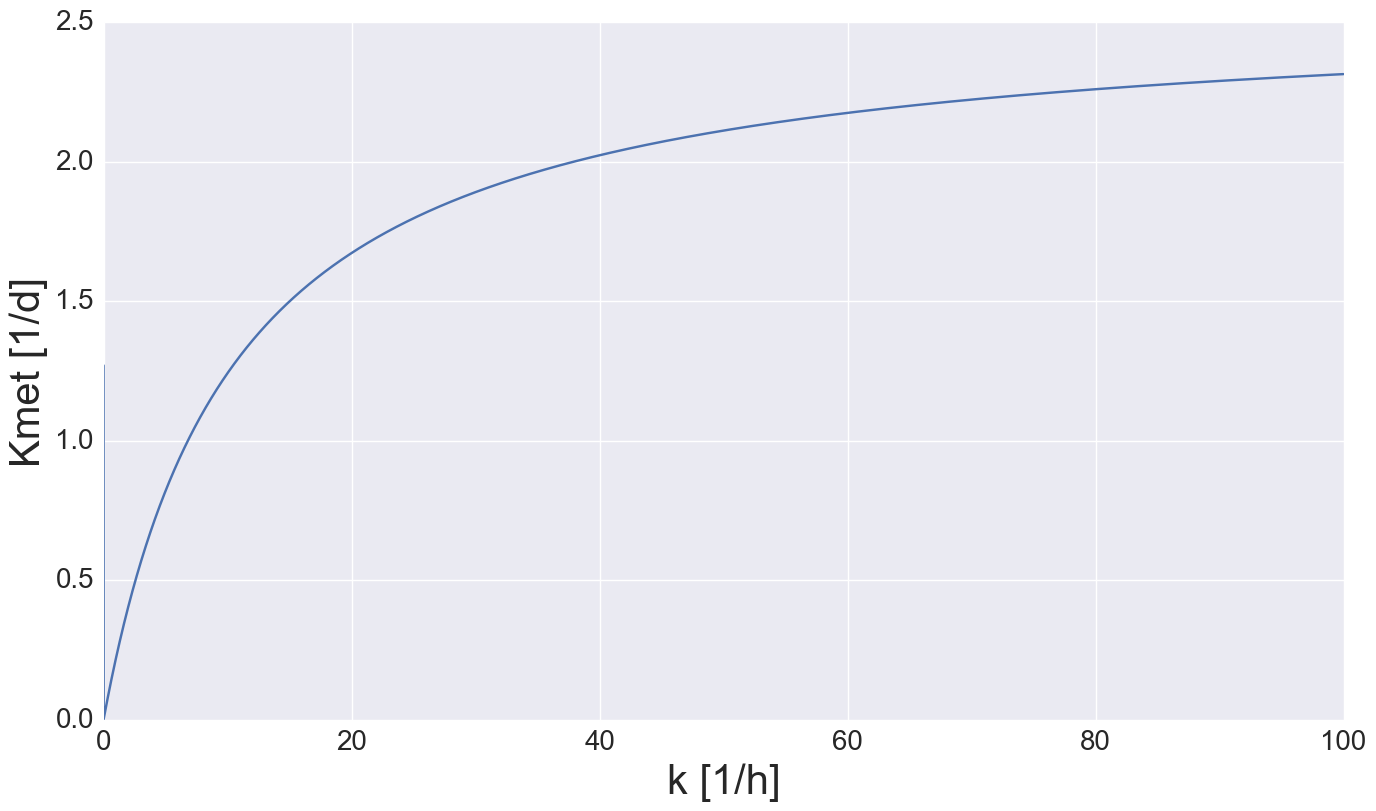

In [57]:
plt.plot(ks, kmets)
plt.xlabel('k [{}]'.format(ks.dimensionality))
plt.ylabel('Kmet [{}]'.format(kmets.dimensionality))

'k 1/h'

1.0 L/(kg*d)


8.235491830530101 L/(kg*d)


1.2701729045683168 1/d
